# Branching ratios

A newly discovered particle was found to be able to decay in two different ways (two different decay channels): A and B. The probability $f_A$ for decay A to happen is called its _branching ratio_.

## Tasks


a) For a fixed number N of observed decays, explain why the number of decays to channel A should follow a binomial distribution.

b) Write down the conditional p.d.f. (aka posterior probability distribution) obtained via Bayes' theorem $P(f_A|\vec{k})$ where $\vec{k}$ are your observations. Explain the parameters and the different terms. What do you want to describe with $P(f_A|\vec{k})$?

c) Assuming a flat prior for the branching ratio $\pi(f_A)=1 \forall f_A\in[0,1]$ calculate and draw the posterior probability distribution for $f_A$ after measuring a single decay, which went to A.

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "A", "B", "B", "A"

e) Calculate and draw the posterior after observing 100 decays, with 63 going to A.


### Hints

1. It is recommended to not start coding right away.
1. Realize what **one experiment** means in this task and how you then construct your Likelihood.

You can solve this problem by explicitly going through the single steps of the calculations. When representing the distributions with numpy arrays, `np.sum()` comes in handy in the calculation of the normalization. Alternatively, you can also use the beta pdf which was discussed in the lecture and which is accessible through the scipy.stats package `from scipy.stats import beta`.


# Bayes 1

### Leon Comanescu and Sarah Seibert

## Solutions

In [1]:
# Import Packages
using CairoMakie

a.) As the newly discovered particle has only two decay channels, each decay can be considered as a random experiment with two possible outcomes, here A and B. This justifies the use of the binomial distribution as a model. Also, as the number of decays to channel A is an integer, the distribution is discrete.

b.) The probability $P(f_A | \vec{k})$ for the decay sequence $\vec{k} = (k_1, ..., k_N)$ to occur when N decays are observed depends only on $f_A$, which corresponds to the parameters $\vec{\lambda}$.
Bayes' theorem states that, by using our prior knowledge of the problem in form of the prior probability distribution $\pi(f_A)$ and the observed decay pattern in form of the likelihood function $L(\vec{k} | f_A)$ where $\vec{k}$ is the observed decay pattern, we can calculate $P(f_A | \vec{k})$. It is given through

$$ P(f_A | \vec{k}) = \frac{ L(\vec{k}|f_A) \cdot \pi(f_A)}{\int L(\vec{k} | f_A) \cdot \pi(f_A) \ \text{d} f_A} $$

where the integral is used to normalise the result.

The likelihood function is the product of the probability density function $f(k_i | f_A)$ for every single decay $k_i$. 
$$ L(\vec{k} | f_A) = \prod_{i=1}^N f(k_i | f_A)$$

The probability density function is
$$ f(k_i | f_A) = \begin{cases} f_A & k_i=A \\ 1-f_A & k_i=B \end{cases} $$

c.) Assuming that the prior probability distribution is 
$$ \pi(f_A) = 1 \quad \forall f_A\in [0,1] $$
and given the decay sequence $N=1$, $ \vec{k} = (A)$ consisting of one single decay which went to A, we can now calculate the posterior probability distribution:
$$ P(f_A | (A)) = \frac{ f(A,f_A) \cdot \pi(f_A)}{\int_0^1 f(A, f_A) \cdot \pi(f_A) \ \text{d} f_A} = \frac{f_A}{\int_0^1 f_A \ \text{d} f_A} = \frac{f_A}{ \frac{1}{2}} = 2 f_A $$

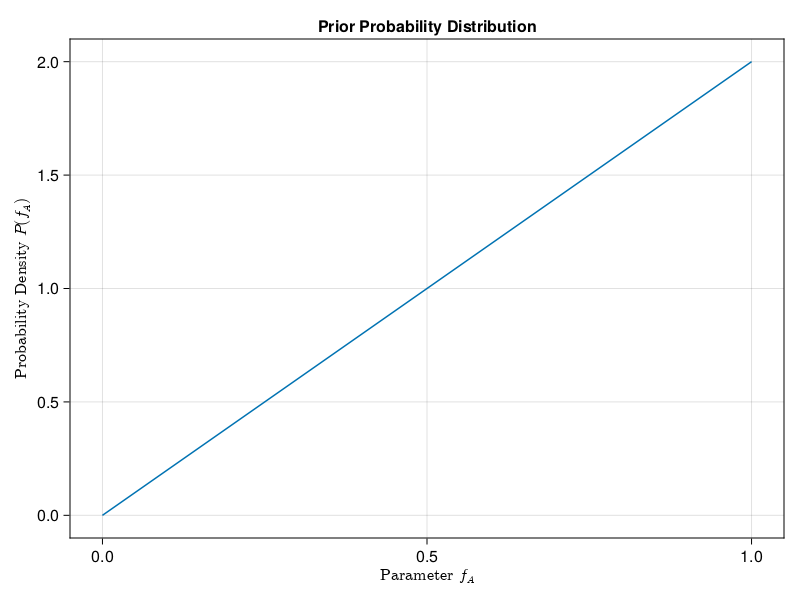

In [2]:
# Plotting the posterior probability distribution

# Set init parameters
f_A = 0:0.0001:1
P_cont = 2*f_A

# Make & Draw plot
figc = Figure()
axc = Axis(figc[1,1], title = "Prior Probability Distribution", xlabel = L"Parameter $f_A$", ylabel = L"Probability Density $P(f_A)$")
lines!(axc, f_A, P_cont)

figc

d.) Now we will write a programm, which uses the previously calculates posterior as the new prior, in order to calculate a new posterior, given the result of a single decay. We will use this programm to iterate through a given decay sequence.

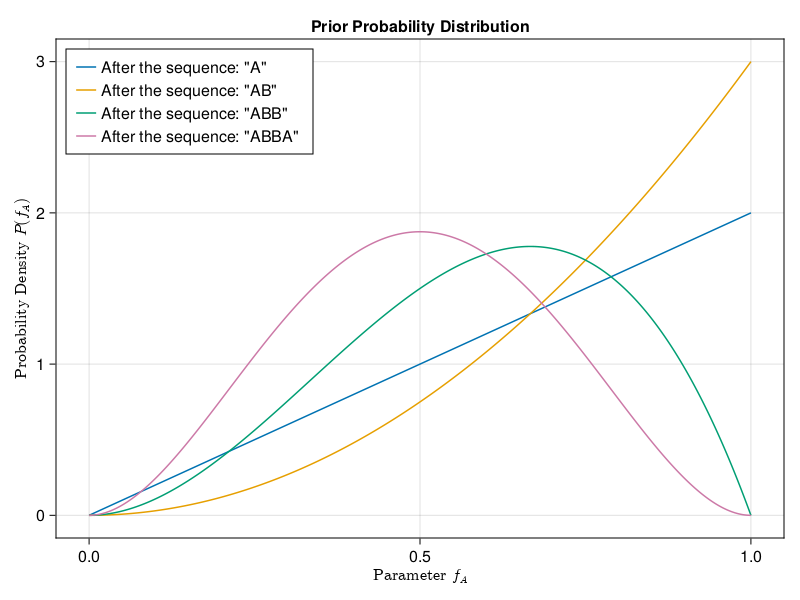

In [3]:
# Init vals
decays = ["A", "B", "B", "A"]
Π = []
push!(Π, 2 .* f_A)

"""
    posterior(val, π)

Computes new posterior based on the previous `π` and the current value `val`.
"""
function posterior(val, π)
    val == "A" ? f = f_A : f = 1 .- f_A
    
    num = π .* f
    return num .* length(num) ./ sum(num)
end

# Draw plot
figd = Figure()
axd = Axis(figd[1,1], title = "Prior Probability Distribution", xlabel = L"Parameter $f_A$", ylabel = L"Probability Density $P(f_A)$")

# Calculate new posterior and draw it
for i ∈ 1:4
    push!(Π, posterior(decays[i], Π[i]))
    lines!(axd, f_A, Π[i], label = """After the sequence: "$(join(decays[1:i]))" """)
end

axislegend(axd, position = :lt)

figd

e.) Again assuming a flat prior ($\pi(f_A)=1$) we will now calculate the posterior probability density after observing 100 decays, 63 of which went to chanel A. In order to do so, we must sum up the likelihood function of all decay patterns $\sigma$ in which there are exactly 63 decays to A:
$$ P(f_A, 63 \cdot A) = \sum_{\vec{k}\in\sigma} L(\vec{k}| f_A) = \sum_{\vec{k}\in\sigma} \prod_{i=1}^{100}f(k_i, f_A) $$
Since the commutative law applies to the product in the expression above, it is equal for all decay patterns which consist of 63 decays to A and 37 decays to B.
$$ P(f_A, 63 \cdot A) = \sum_{\vec{k}\in\sigma} f_A^{63} \cdot (1-f_A)^{37} $$
Now the resulting expression in the sum no longer depends on the decay pattern wich one chooses, so we must only find the number of patterns with the right amount of decays to A. This is given through the binomial coefficiant $\binom{100}{63}$, leaving the following equation:
$$ P(f_A, 63 \cdot A) = \binom{100}{63} f_A^{63} \cdot (1-f_A)^{100-63} $$
This formula is well known to us as it is used to describe binomial distributions. Putting in the actual numbers gives us the posterior probability density:
$$ P(f_A, 63 \cdot A) = 3.42 \cdot 10^{27} \cdot f_A^{63} \cdot (1-f_A)^{37} $$
To give ourselves a better idea of this probability density, we will draw is.

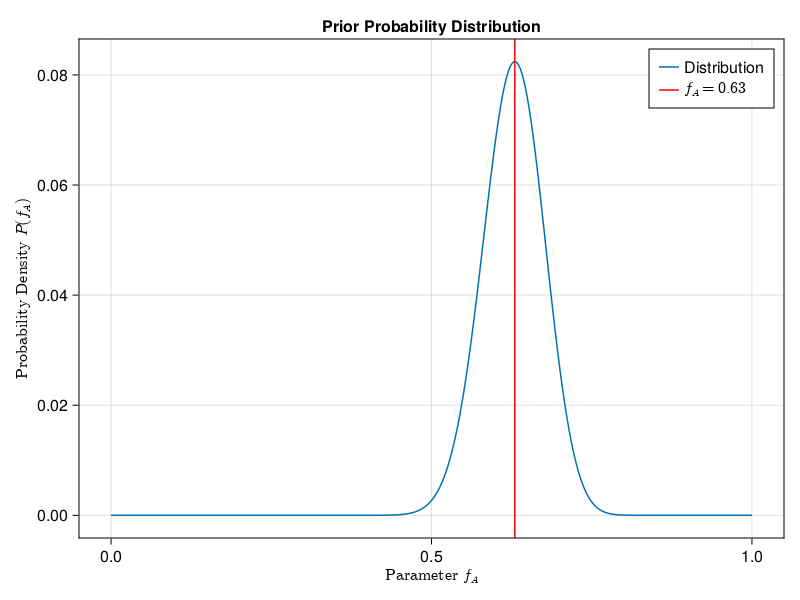

In [4]:
# Define Binomial prob
@. P_bi(n, k, p) = binomial(n, k) * p^k * (1 - p)^(n-k)

# Make & Draw plot
fige = Figure()
axe = Axis(fige[1,1], title = "Prior Probability Distribution", xlabel = L"Parameter $f_A$", ylabel = L"Probability Density $P(f_A)$")
lines!(axe, f_A, P_bi(big(100), 63, f_A), label = "Distribution")
vlines!(axe, 0.63, label = L"f_A = 0.63", color = :red)
axislegend(axe)

fige

As expected due to the number of decays to chanel A, the posterior probability density function has its maximum at the parameter value $f_A = 0.63$. However, it still has a width that differs from zero. 